<img src = "Classgap_Doc.png">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("text.csv", encoding= 'unicode_escape')

In [3]:
data.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               7156 non-null   int64  
 1   _golden                7156 non-null   bool   
 2   _unit_state            7156 non-null   object 
 3   _trusted_judgments     7156 non-null   int64  
 4   _last_judgment_at      7079 non-null   object 
 5   sentiment              7156 non-null   object 
 6   sentiment:confidence   7156 non-null   float64
 7   our_id                 7156 non-null   int64  
 8   sentiment_gold         77 non-null     object 
 9   sentiment_gold_reason  77 non-null     object 
 10  text                   7156 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 566.2+ KB


In [5]:
# check for missing values
for i in data.columns: 
    print(i, data[i].isna().sum())

_unit_id 0
_golden 0
_unit_state 0
_trusted_judgments 0
_last_judgment_at 77
sentiment 0
sentiment:confidence 0
our_id 0
sentiment_gold 7079
sentiment_gold_reason 7079
text 0


In [6]:
for i, row in data.iterrows(): 
    print(row['sentiment_gold_reason'])

Author is excited about the development of the technology.
Author is excited that driverless cars will benefit the disabled.
The author is skeptical of the safety and reliability of a driverless car.
The author is skeptical of the project's value.
Author is making an observation without expressing an opinion.
Author is asking a question without expressing an opinion.
Trains (metros) are not relevant to the focus of this project.  Please re-read the instructions.
Author is not referring to self-driving cars. Please re-read the instructions.
Shows excitement that autonomous vehicles will improve safety
Shows fear that driverless cars will not be safe or reliable
Simply states a fact, not an opinion
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [7]:
clean_data = data.drop(['_last_judgment_at'], axis = 1)
compare_hg_ag = clean_data.dropna()

In [8]:
# Comparing the automatically generated sentiment to the human generated sentiment
compare_hg_ag

,_unit_id,_golden,_unit_state,_trusted_judgments,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
...,...,...,...,...,...,...,...,...,...,...
7151,726942339,True,golden,65,not_relevant,0.5616,10073,not_relevant,Trains (metros) are not relevant to the focus ...,Washington DC metro trains are all self-drivin...
7152,726942340,True,golden,71,not_relevant,0.7293,10074,not_relevant,Outside the scope of the task,I think #DARPA works on autonomous drone techn...
7153,726942341,True,golden,63,not_relevant,0.8854,10075,not_relevant,Outside the scope of the task,I love the idea of driving myself to the denti...
7154,726942342,True,golden,67,not_relevant,0.8431,10076,not_relevant,Outside the scope of the task,Who likes cars these days? No me. Too expensiv...


### EDA

- 1 - Perform Exploratory Analysis: summary stats and histograms on numeric fields. Which variables are categorical and which ones are continuous. 


- 2 - Indicate if you see any problems using the data to build a model that predicts the sentiment.

In [9]:
# summary stats
data.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,our_id
count,7.156000e+03,7156.000000,7156.000000,7156.000000
mean,7.243474e+08,5.834405,0.774654,3609.930548
std,2.506742e+05,11.144930,0.205363,2140.401611
min,7.242270e+08,1.000000,0.248000,1.000000
25%,7.243229e+08,3.000000,0.630600,1789.750000
50%,7.243247e+08,4.000000,0.753100,3578.500000
75%,7.243265e+08,8.000000,1.000000,5367.250000
max,7.269423e+08,241.000000,1.000000,10077.000000


In [10]:
# data correlations
data.corr()

ValueError: could not convert string to float: 'golden'

In [ ]:
plt.hist(data['sentiment:confidence'], bins = 20)
plt.show()

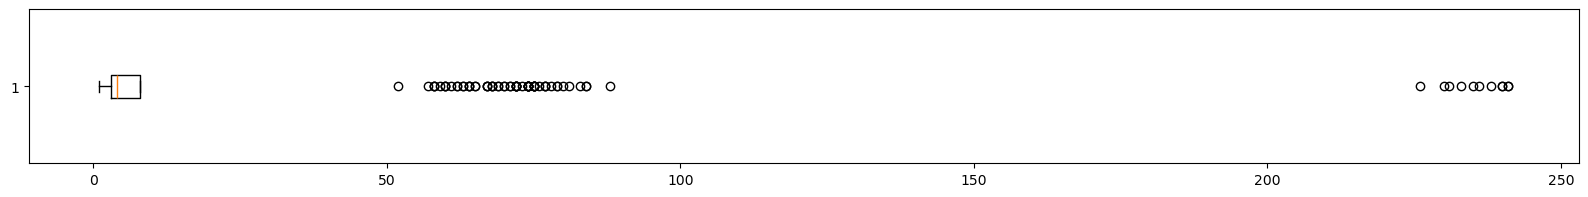

In [11]:
plt.figure(figsize= (20, 2))
plt.boxplot(data['_trusted_judgments'], vert = False)
plt.show()

In [12]:
text_len = []
for i, row in data.iterrows(): 
    tl = len(row['text'])
    #print(tl)
    text_len.append(tl)

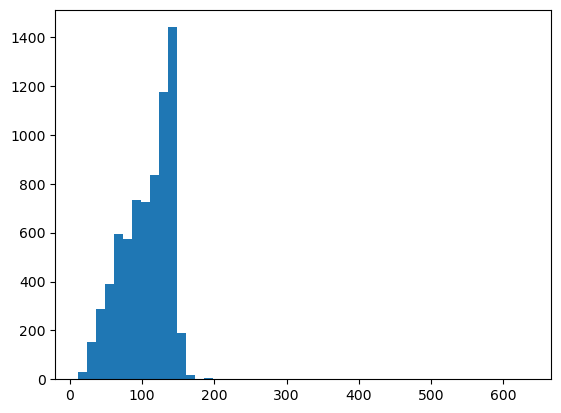

In [13]:
plt.hist(text_len, bins = 50)
plt.show()

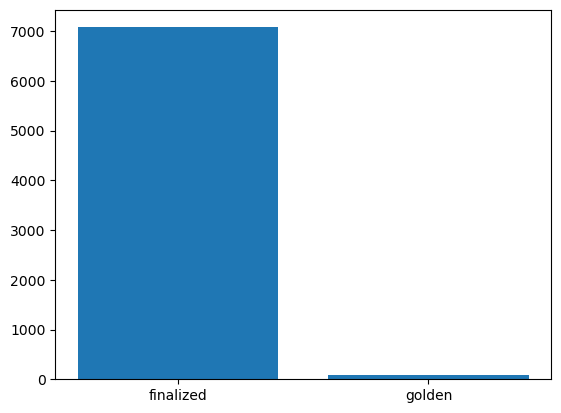

In [14]:
# visualization of a categorical variable
us_vc = data._unit_state.value_counts()
plt.bar(us_vc.index,us_vc.values)
plt.show()

## Tokenize the tweets for analysis by using spaCy. 

In [15]:
# import spaCy and load the english language module.
import spacy
from spacy.lang.en import English
nlp = spacy.load("en_core_web_trf")

OSError: [E050] Can't find model 'en_core_web_trf'. It doesn't seem to be a Python package or a valid path to a data directory.

### How to find (POS) parts of speech 

In [ ]:
counter = 0
for i, row in data.iterrows(): 
    # Process a text
    doc = nlp(str(row['text']))
    counter +=1 
    if counter > 30: break
    for token in doc:
        # Get the token text, part-of-speech 
        token_text = token.text
        token_pos = token.pos_
        print(token, token_pos)
       

### How to find (NER) named entity recognition 

In [ ]:
counter = 0
for i, row in data.iterrows(): 
    # Process a text
    doc = nlp(str(row['text']))
    counter +=1 
    if counter > 30: break
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)

### Punctuation based tokens

In [16]:
counter = 0
for i, row in data.iterrows(): 
    # Process a text
    doc = nlp(str(row['text']))
    counter +=1 
    if counter > 30: break
    for token in doc:
        if token.is_punct:
            print(token)
        

NameError: name 'nlp' is not defined

### Most common words

In [17]:
from collections import Counter

all_text = []
counter = 0
for i, row in data.iterrows(): 
    # Process a text
    doc = nlp(str(row['text']))
    counter +=1 
    if counter > 30: break
    for token in doc: 
        if not token.is_stop and not token.is_punct:
            all_text.append(token.text)

            # five most common tokens
word_freq = Counter(all_text)
common_words = word_freq.most_common(5)
print('The most common words and their frequency : ', common_words)

NameError: name 'nlp' is not defined

### What are the top 10 tokens for each sentiment rating 

In [18]:
# show how many entries for each category
data.sentiment.value_counts()

sentiment
3               4245
4               1444
2                685
5                459
not_relevant     213
1                110
Name: count, dtype: int64

In [19]:
gbs = data.groupby('sentiment')

In [20]:
reldata = data[data['sentiment']!= 'not_relevant']

In [21]:
reldata.shape

(6943, 11)

In [22]:
reldata = reldata.reset_index()

In [23]:
reldata

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6938,7141,726942329,True,golden,60,NaN,3,0.9275,10063,3,"Simply states a fact, not an opinion",Florida is one of a few states that allows tes...
6939,7142,726942330,True,golden,61,NaN,3,0.8449,10064,3,"Simply states a fact, not an opinion",Many states still considering allowing self-dr...
6940,7143,726942331,True,golden,58,NaN,3,0.7704,10065,3,"Simply states a fact, not an opinion",Heading to a tech conference which will focus ...
6941,7144,726942332,True,golden,74,NaN,3,0.8874,10066,3,"Simply states a fact, not an opinion",Fully autonomous vehicles are one of many auto...


In [24]:
reldata.drop(['sentiment_gold', 'sentiment_gold_reason', '_last_judgment_at'], axis = 1,  inplace = True)

In [25]:
for i in reldata.columns: 
    print(i, reldata[i].isna().sum())
reldata.info()  

index 0
_unit_id 0
_golden 0
_unit_state 0
_trusted_judgments 0
sentiment 0
sentiment:confidence 0
our_id 0
text 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6943 entries, 0 to 6942
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6943 non-null   int64  
 1   _unit_id              6943 non-null   int64  
 2   _golden               6943 non-null   bool   
 3   _unit_state           6943 non-null   object 
 4   _trusted_judgments    6943 non-null   int64  
 5   sentiment             6943 non-null   object 
 6   sentiment:confidence  6943 non-null   float64
 7   our_id                6943 non-null   int64  
 8   text                  6943 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 440.8+ KB


In [26]:
reldata2 = pd.get_dummies(reldata,  columns=['_golden', '_unit_state'])

In [27]:
reldata2

,index,_unit_id,_trusted_judgments,sentiment,sentiment:confidence,our_id,text,_golden_False,_golden_True,_unit_state_finalized,_unit_state_golden
0,0,724227031,236,5,0.7579,10001,Two places I'd invest all my money if I could:...,False,True,False,True
1,1,724227032,231,5,0.8775,10002,Awesome! Google driverless cars will help the ...,False,True,False,True
2,2,724227033,233,2,0.6805,10003,If Google maps can't keep up with road constru...,False,True,False,True
3,3,724227034,240,2,0.8820,10004,Autonomous cars seem way overhyped given the t...,False,True,False,True
4,4,724227035,240,3,1.0000,10005,Just saw Google self-driving car on I-34. It w...,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6938,7141,726942329,60,3,0.9275,10063,Florida is one of a few states that allows tes...,False,True,False,True
6939,7142,726942330,61,3,0.8449,10064,Many states still considering allowing self-dr...,False,True,False,True
6940,7143,726942331,58,3,0.7704,10065,Heading to a tech conference which will focus ...,False,True,False,True
6941,7144,726942332,74,3,0.8874,10066,Fully autonomous vehicles are one of many auto...,False,True,False,True


In [28]:
reldata2=reldata2.astype({'sentiment': 'float'})
reldata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6943 entries, 0 to 6942
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  6943 non-null   int64  
 1   _unit_id               6943 non-null   int64  
 2   _trusted_judgments     6943 non-null   int64  
 3   sentiment              6943 non-null   float64
 4   sentiment:confidence   6943 non-null   float64
 5   our_id                 6943 non-null   int64  
 6   text                   6943 non-null   object 
 7   _golden_False          6943 non-null   bool   
 8   _golden_True           6943 non-null   bool   
 9   _unit_state_finalized  6943 non-null   bool   
 10  _unit_state_golden     6943 non-null   bool   
dtypes: bool(4), float64(2), int64(4), object(1)
memory usage: 406.9+ KB


In [29]:
result = reldata2.select_dtypes(include='number')
result2 = result.drop(['_unit_id', 'our_id'], axis = 1)
result2

,index,_trusted_judgments,sentiment,sentiment:confidence
0,0,236,5.0,0.7579
1,1,231,5.0,0.8775
2,2,233,2.0,0.6805
3,3,240,2.0,0.8820
4,4,240,3.0,1.0000
...,...,...,...,...
6938,7141,60,3.0,0.9275
6939,7142,61,3.0,0.8449
6940,7143,58,3.0,0.7704
6941,7144,74,3.0,0.8874


In [191]:
result2.drop(['index'], axis = 1, inplace = True)

In [192]:
y = result2['sentiment']

In [193]:
X = result2.drop(['sentiment'], axis = 1)

### Using CountVectorizer 

In [194]:
import string
all_tweets = []

for i, row in reldata.iterrows(): 
    tweet_i = []  
    elements = str(row['text']).split()
    for el in elements: 
        if el.startswith('http') or el.startswith('\\') or el in string.punctuation: continue
        tweet_i.append(el)
    all_tweets.append(' '.join(tweet_i))   

In [195]:
len(all_tweets)

6943

In [196]:
all_tweets[:30]

["Two places I'd invest all my money if I could: 3D printing and Self-driving cars!!!",
 'Awesome! Google driverless cars will help the blind travel more often;',
 "If Google maps can't keep up with road construction, how am I supposed to trust a driverless car to get around here?",
 'Autonomous cars seem way overhyped given the technology challenges; pilotless planes seem much more doable and needed.',
 'Just saw Google self-driving car on I-34. It was painted green and blue.',
 'Will driverless cars eventually replace taxi drivers in cities?',
 "Autonomous vehicles could reduce traffic fatalities by 90%...I'm in!",
 "Driverless cars are not worth the risk. Don't want to be on the highway when the server crashes #SadMacFace #BlueScreenofDeath",
 'Driverless cars are now legal in Florida, California, and Michigan',
 'Audi is the first carmaker to get a license from Nevada DMV to test automated vehicles. #audi #ces #cartech',
 "Audi says first car manufacturer in the world to get a lice

In [197]:
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(all_tweets)

In [198]:
dtm.shape

(6943, 11644)

In [199]:
reldata.shape

(6943, 9)

In [200]:
data = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())

C:\Users\alket\anaconda3\envs\ds10\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [201]:
data

,00,000,00000001,015,044qekbaaj,0ne_am,10,100,1000,1000x,...,üèïå_,üèïå_ì,üèïåµ,üèïåá,üèïåâ,üèïåè,üèïèï,üì,üìô,üìøå_å
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
all_data = pd.concat([X, data], axis=1)

In [203]:
X = all_data.values

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [206]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [207]:
predictions = clf.predict(X_test)

In [208]:
from sklearn.metrics import classification_report

In [210]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        31
         2.0       0.00      0.00      0.00       214
         3.0       0.61      1.00      0.76      1391
         4.0       0.00      0.00      0.00       493
         5.0       0.00      0.00      0.00       163

    accuracy                           0.61      2292
   macro avg       0.12      0.20      0.15      2292
weighted avg       0.37      0.61      0.46      2292



C:\Users\alket\anaconda3\envs\ds10\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alket\anaconda3\envs\ds10\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alket\anaconda3\envs\ds10\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
from sklearn.metrics import balanced_accuracy_score

In [214]:
print(balanced_accuracy_score(y_test, predictions))

0.2
